# Hard square

The hard square system is the simplest example of a hard particle Monte Carlo simulation of particles that have orientation.

## Initialize

Import the hoomd python package and the hpmc component to perform hard particle Monte Carlo simulations.

In [35]:
import hoomd
import hoomd.hpmc
from hoomd import deprecated

Initialize the execution context to control where HOOMD will execute the simulation. This is a very small simulation, run it on the CPU.

In [31]:
hoomd.context.initialize("--mode=cpu");

Initialize the system with particles on a $n$ by $n$ square lattice. The lattice initializer by default creates all particles named type "A".

In [36]:
#system = hoomd.init.create_lattice(unitcell=hoomd.lattice.fcc(a=1.2),n=10);
system=deprecated.init.create_random(N=3, phi_p=0.40, min_dist=0.5)

notice(2): Group "all" created containing 3 particles


# Define hard particle interactions

Use the ``convex_spheropolyhedron`` integrator. The parameter *d* sets the maximum displacement for a translation trial move, *a* sets the maximum rotation distance for a rotation move. 
The parameter *implicit* is used to specify using an implicit depletant.
Also, we specify a *circumsphere* depletant_mode.

In [50]:
mc = hoomd.hpmc.integrate.convex_spheropolyhedron(seed=415236, 
                                                  d=0.3, 
                                                  a=0.4, 
                                                  implicit=True, 
                                                  depletant_mode='circumsphere')
mc.set_params(nR=3,depletant_type='A')

-----
You are using implicit depletants. Please cite the following:
* J Glaser, A S Karas, and S C Glotzer. "A parallel algorithm for implicit
  depletant simulations", The Journal of Chemical Physics 143 (2015) 184110
-----


Specify the square shape with a list of vertices in counter-clockwise order.

In [51]:
tetrahedron_verts = [(0.5, 0.5, 0.5), (0.5, -0.5, -0.5), (-0.5, 0.5, -0.5), (-0.5, -0.5, 0.5)]
mc.shape_param.set('A',vertices=tetrahedron_verts);
#mc.shape_param['SphericalDepletant'].set(vertices=[], sweep_radius=0.1);

## Write output

Periodically write the particle configurations to a gsd file.

In [55]:
d = hoomd.dump.gsd("trajectory.gsd",
                   period=10,
                   group=hoomd.group.all(),
                   overwrite=True);

from hoomd import dump
d1=dump.dcd(filename='traj.dcd', period=10, overwrite=True)

## Run the simulation

In [57]:
hoomd.run(100);
deprecated.dump.xml(group=hoomd.group.all(),filename='final.hoomdxml', all=True)

** starting run **
Time 16:53:07 | Step 500 / 500 | TPS 20404 | ETA 00:00:00
Average TPS: 16983.7
---------
notice(2): -- HPMC stats:
notice(2): Average translate acceptance: 0
notice(2): Average rotate acceptance:    0
notice(2): Trial moves per second:        177096
notice(2): Overlap checks per second:     2.13828e+06
notice(2): Overlap checks per trial move: 12.0742
notice(2): Number of overlap errors:      0
notice(2): -- Implicit depletants stats:
notice(2): Depletant insertions per second:          0
notice(2): Configurational bias attempts per second: 0
notice(2): Fraction of depletants in free volume:    0
notice(2): Fraction of overlapping depletants:       0
** run complete **


## Examine the output

Examine how the system configuration evolves over time. [ex_render](ex_render.py) is a helper script that builds animated gifs from trajectory files and system snapshots. It is part of the [hoomd-examples](https://bitbucket.org/glotzer/hoomd-examples) repository and designed only to render these examples.

In [41]:
import ex_render
ex_render.display_movie(lambda x: ex_render.render_sphere_frame(x, tetrahedron_verts), 'trajectory.gsd');

TypeError: Incompatible function arguments. The following argument types are supported:
    1. (fresnel._common.vec3f, float, float, float) -> NoneType
    Invoked with: <fresnel._common.vec3f (0, -8.58993e+09, 3.18217e+20)>, [(0.5, 0.5, 0.5), (0.5, -0.5, -0.5), (-0.5, 0.5, -0.5), (-0.5, -0.5, 0.5)], [(0.5, 0.5, 0.5), (0.5, -0.5, -0.5), (-0.5, 0.5, -0.5), (-0.5, -0.5, 0.5)], [(0.5, 0.5, 0.5), (0.5, -0.5, -0.5), (-0.5, 0.5, -0.5), (-0.5, -0.5, 0.5)]

## Controlling rotation moves

The __a__ parameter, specified to __integrate.convex_polygon__ defines the maximum rotation move size. In 2D, this is a maximum angle of rotation in radians. In 3D simulations, it is not intuitive to explain, but larger values lead to larger rotations monotonically.

Each trial move has a probability of being either a translation or rotation. You can set that probability with the __move_ratio__ parameter. A value of 0 results in no translation moves and all rotation moves.

In [9]:
mc.set_params(move_ratio=0.0);

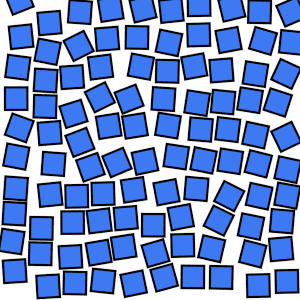

In [10]:
d.disable();
d = hoomd.dump.gsd("trajectory.gsd", period=10, group=hoomd.group.all(), overwrite=True);
hoomd.run(100, quiet=True);
ex_render.display_movie(lambda x: ex_render.render_polygon_frame(x, square_verts), 'trajectory.gsd');

Setting __move_ratio__ to 1.0 results in all translation moves.

In [11]:
mc.set_params(move_ratio=1.0);

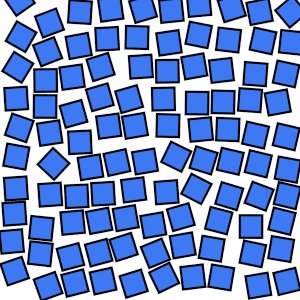

In [12]:
d.disable();
d = hoomd.dump.gsd("trajectory.gsd", period=10, group=hoomd.group.all(), overwrite=True);
hoomd.run(100, quiet=True);
ex_render.display_movie(lambda x: ex_render.render_polygon_frame(x, square_verts), 'trajectory.gsd');